In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xa

In [49]:
path = '/Users/bell/ecoraid/2024/Moorings/24sh1a/final_data_cf/*.nc'

xdf = xa.open_mfdataset(path)
xdf

<xarray.Dataset>
Dimensions:       (time: 8652, depth: 1, latitude: 1, longitude: 1)
Coordinates:
  * time          (time) datetime64[ns] 2024-09-19T06:00:00 ... 2025-09-14T17...
  * latitude      (latitude) float64 54.85
  * longitude     (longitude) float64 -159.0
  * depth         (depth) float64 63.0
Data variables:
    temperature   (time, depth, latitude, longitude) float64 dask.array<chunksize=(8652, 1, 1, 1), meta=np.ndarray>
    conductivity  (time, depth, latitude, longitude) float64 dask.array<chunksize=(8652, 1, 1, 1), meta=np.ndarray>
    pressure      (time, depth, latitude, longitude) float64 dask.array<chunksize=(8652, 1, 1, 1), meta=np.ndarray>
    salinity      (time, depth, latitude, longitude) float64 dask.array<chunksize=(8652, 1, 1, 1), meta=np.ndarray>
Attributes: (12/33)
    Latitude_DegMMddW:                      54 50.8687 N
    Longitude_DegMMddN:                     158 59.6717 W
    MooringID:                              24SH-1A
    platform_deployment_date:               2024-09-19T05:34:23Z
    platform_deployment_cruise_name:        DY2410
    platform_recovery_date:                 2025-09-14T17:51:00Z
    ...                                     ...
    InstrumentSerialNumber:                 1842
    InstrumentType:                         SBE-37
    date_created:                           2025-09-24T10:11:11Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

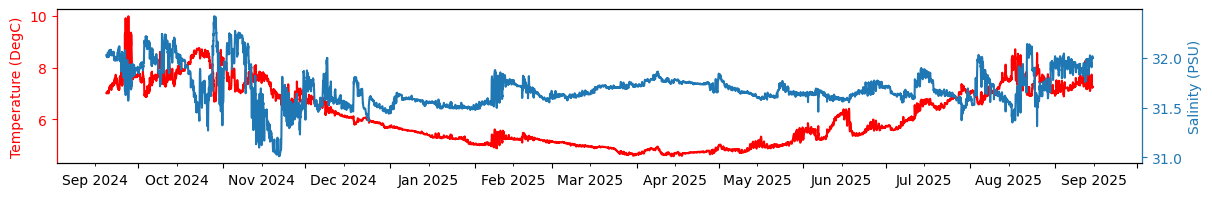

In [50]:
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(14, 2))
ax.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0,'depth':0}).temperature,'r', label='temperature')
ax2 = ax.twinx()
ax2.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0,'depth':0}).salinity, label='salinity')

ax.set_ylabel('Temperature (DegC)',c='r')
ax2.set_ylabel('Salinity (PSU)',c='C0')
ax2.spines['right'].set_color('C0')
ax2.spines['left'].set_color('r')
ax.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='C0')

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)